In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import log

filePath = "arnetminer/AP_train.txt"
#filePath = "sample-data"
file = open(filePath,'r')

authorPublications = {}  #{author, #publications}
venuePublications = {}   #{venue, #publications}

for line in file:      
         
    # compute no. of publications for each author    
    if line.startswith("#@"):
        authors = line[2:].strip().split(";")
        for author in authors:
            author = author.strip()
            if author != "":
                if authorPublications.get(author) is None:
                    authorPublications[author] = 1
                else:
                    authorPublications[author] = authorPublications.get(author) + 1            

    # compute no. of publications for each venue                
    if line.startswith("#c"):
        venue = line[2:].strip()
        if venue != "":
            if venuePublications.get(venue) is None:
                venuePublications[venue] = 1
            else:
                venuePublications[venue] = venuePublications.get(venue) + 1
   
file.close()

# converts to linear array (used for computing statistics)
def getWeightedArray(xvalues, weights):
     zippedArray = zip(xvalues, weights)
     weightedArray = []
     for item in zippedArray:
         for frequency in range(item[1]):
             weightedArray.append(item[0])
     return weightedArray

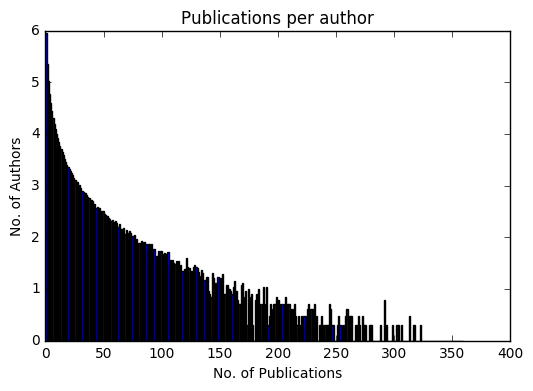

In [10]:
publicationsPerAuthor = {}

# create a list of publications per author to plot histogram
for author in authorPublications.keys():
    count = authorPublications.get(author)
    if publicationsPerAuthor.get(count) is None:
        publicationsPerAuthor[count] = 1
    else:
        publicationsPerAuthor[count] = publicationsPerAuthor.get(count)+1

xvalues = np.array(list(publicationsPerAuthor.keys()))
yvalues = np.array(list(publicationsPerAuthor.values()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of Authors')
plt.xlabel('No. of Publications')
plt.title('Publications per author')
plt.show()

In [11]:
# calculate the required statistics
weightedArray = getWeightedArray(xvalues, yvalues)

mean = np.mean(weightedArray)
std = np.std(weightedArray)
quartile1 = np.percentile(weightedArray, 25)
quartile2 = np.percentile(weightedArray, 50)
quartile3 = np.percentile(weightedArray, 75)

print("The mean of publications per author :", mean)
print("The standard deviation of publications per author :", std)
print("The variance of publications per author :", std*std)
print("First Quartile (Q1) / 25th Percentile : ", quartile1)
print("Second Quartile (Q2) / 50th Percentile / Median : ", quartile2)
print("Third Quartile (Q3) / 75th Percentile : ", quartile3)

The mean of publications per author : 3.29178560295
The standard deviation of publications per author : 8.87188969104
The variance of publications per author : 78.71042669
First Quartile (Q1) / 25th Percentile :  1.0
Second Quartile (Q2) / 50th Percentile / Median :  1.0
Third Quartile (Q3) / 75th Percentile :  2.0


* In case of "publications per author", the mean (3.29) is greater than the median (1.0). This shows that the distribution is skewed to the right i.e saturated towards the left side and with a "tail" stretching towards the right. 


* Q1 is same as Q2 (median), this tells us that "publications per author" are closely packed in the first half of the distribution. i.e large number of publications have just 1 author.


* The Interquartile Range(IQR) = Q1-Q3 = 1.0. i.e 50% of the data points lie between 1.0 and 2.0 and 75% of the data points between 0 and 2.0. This says thet the disrtibution very highly saturated towards the left.


* The range is ~300 but the standard deviation is 8.87. This tells that large number of data points are present near the mean.

In [15]:
publicationsPerVenue = {}
maxPubVenue = ""
maxCount = 0

# create a list of publications per venue to plot histogram
for venue in venuePublications.keys():
    count = venuePublications.get(venue)
    if count > maxCount:
        maxCount = count;
        maxPubVenue = venue
        
    if publicationsPerVenue.get(count) is None:
        publicationsPerVenue[count] = 1
    else:
        publicationsPerVenue[count] = publicationsPerVenue.get(count)+1

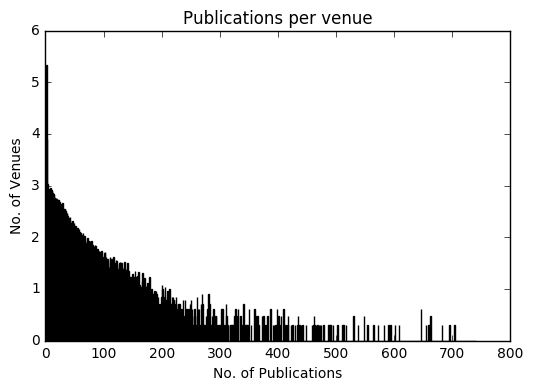

In [16]:
yvalues = np.array(list(publicationsPerVenue.values()))
xvalues = np.array(list(publicationsPerVenue.keys()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of Venues')
plt.xlabel('No. of Publications')
plt.title('Publications per venue') 
plt.show()

In [17]:
# calculate the required statistics
weightedArray = getWeightedArray(xvalues, yvalues)

mean = np.mean(weightedArray)
std = np.std(weightedArray)
quartile1 = np.percentile(weightedArray, 25)
quartile2 = np.percentile(weightedArray, 50)
quartile3 = np.percentile(weightedArray, 75)

print("The mean of publications per venue :", mean)
print("The standard deviation of publications per venue :", std)
print("The variance of publications per venue :", std*std)
print("First Quartile (Q1) / 25th Percentile : ", quartile1)
print("Second Quartile (Q2) / 50th Percentile / Median : ", quartile2)
print("Third Quartile (Q3) / 75th Percentile : ", quartile3)

The mean of publications per venue : 7.73096583687
The standard deviation of publications per venue : 83.3809075408
The variance of publications per venue : 6952.37574233
First Quartile (Q1) / 25th Percentile :  1.0
Second Quartile (Q2) / 50th Percentile / Median :  1.0
Third Quartile (Q3) / 75th Percentile :  1.0


In [18]:
print("The venue with largest no. of publications :", maxPubVenue)
print("Largest publication count at a single venue :", maxCount)

The venue with largest no. of publications : IEEE Transactions on Information Theory
Largest publication count at a single venue : 11227
